<a href="https://colab.research.google.com/github/Snowdenstyll/keno/blob/main/Ontario_DailyKeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [211]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [212]:
df = pd.read_csv("/content/2023.csv")

In [213]:
df.head()

,PlayDate,AP,N01,N02,N03,N04,N05,N06,N07,N08,...,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
0,Nov 30 2023,A,9,10,13,14,17,18,19,32,...,40,47,49,52,53,55,62,67,69,70
1,Nov 29 2023,P,1,4,6,10,12,15,17,19,...,40,44,46,47,51,54,56,57,60,68
2,Nov 29 2023,A,1,4,5,6,10,15,18,26,...,42,45,48,51,55,56,62,65,68,69
3,Nov 28 2023,P,5,6,8,9,12,15,23,25,...,42,43,47,48,49,56,57,63,65,66
4,Nov 28 2023,A,2,3,4,9,19,20,22,23,...,41,48,54,55,57,58,60,61,63,66


In [214]:
df.tail()

,PlayDate,AP,N01,N02,N03,N04,N05,N06,N07,N08,...,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
660,Jan 03 2023,A,5,6,7,10,21,22,24,25,...,34,39,43,45,46,48,49,57,59,65
661,Jan 02 2023,P,2,3,4,7,15,24,25,30,...,44,47,48,53,54,56,58,60,66,68
662,Jan 02 2023,A,2,9,11,14,21,24,29,38,...,47,48,50,57,58,59,60,61,66,70
663,Jan 01 2023,P,4,5,10,11,13,18,19,27,...,37,41,43,44,47,48,55,58,63,70
664,Jan 01 2023,A,3,7,9,14,19,21,22,30,...,38,39,43,53,54,56,61,64,65,69


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PlayDate  665 non-null    object
 1   AP        665 non-null    object
 2   N01       665 non-null    int64 
 3   N02       665 non-null    int64 
 4   N03       665 non-null    int64 
 5   N04       665 non-null    int64 
 6   N05       665 non-null    int64 
 7   N06       665 non-null    int64 
 8   N07       665 non-null    int64 
 9   N08       665 non-null    int64 
 10  N09       665 non-null    int64 
 11  N10       665 non-null    int64 
 12  N11       665 non-null    int64 
 13  N12       665 non-null    int64 
 14  N13       665 non-null    int64 
 15  N14       665 non-null    int64 
 16  N15       665 non-null    int64 
 17  N16       665 non-null    int64 
 18  N17       665 non-null    int64 
 19  N18       665 non-null    int64 
 20  N19       665 non-null    int64 
 21  N20       665 no

In [216]:
df.describe()

,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.00000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,3.106767,6.418045,9.804511,13.082707,16.666165,20.275188,23.702256,27.210526,30.654135,33.92782,37.284211,40.527820,43.947368,47.511278,50.843609,54.016541,57.448120,60.726316,64.136842,67.673684
std,2.353995,3.368391,4.129782,4.843088,5.389622,5.785399,5.972458,5.908760,5.989002,5.98373,6.033701,6.084463,5.882786,5.643282,5.481862,5.221714,4.710355,4.366871,3.705773,2.515671
min,1.000000,2.000000,3.000000,4.000000,5.000000,8.000000,11.000000,12.000000,14.000000,17.00000,21.000000,24.000000,26.000000,31.000000,35.000000,37.000000,39.000000,40.000000,46.000000,58.000000
25%,1.000000,4.000000,7.000000,9.000000,13.000000,16.000000,20.000000,23.000000,26.000000,30.00000,33.000000,36.000000,40.000000,44.000000,47.000000,51.000000,55.000000,58.000000,62.000000,66.000000
50%,2.000000,6.000000,9.000000,12.000000,16.000000,20.000000,23.000000,27.000000,31.000000,34.00000,37.000000,40.000000,44.000000,48.000000,51.000000,55.000000,58.000000,61.000000,65.000000,68.000000
75%,4.000000,8.000000,12.000000,16.000000,20.000000,24.000000,28.000000,31.000000,35.000000,37.00000,41.000000,45.000000,48.000000,52.000000,55.000000,58.000000,61.000000,64.000000,67.000000,70.000000
max,15.000000,19.000000,27.000000,28.000000,35.000000,43.000000,46.000000,47.000000,49.000000,51.00000,54.000000,57.000000,58.000000,61.000000,62.000000,64.000000,67.000000,68.000000,69.000000,70.000000


In [217]:
df.drop(['PlayDate', 'AP'], axis=1, inplace=True)

In [218]:
df.head()

,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
0,9,10,13,14,17,18,19,32,34,39,40,47,49,52,53,55,62,67,69,70
1,1,4,6,10,12,15,17,19,34,37,40,44,46,47,51,54,56,57,60,68
2,1,4,5,6,10,15,18,26,31,33,42,45,48,51,55,56,62,65,68,69
3,5,6,8,9,12,15,23,25,40,41,42,43,47,48,49,56,57,63,65,66
4,2,3,4,9,19,20,22,23,36,39,41,48,54,55,57,58,60,61,63,66


In [219]:
scaler = StandardScaler().fit(df.values)
transformed_dataset = scaler.transform(df.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)

In [225]:
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.505387,1.064203,0.774349,0.189545,0.061987,-0.393560,-0.787916,0.811182,0.559089,0.848300,0.450442,1.064523,0.859531,0.796008,0.393664,0.188482,0.967083,1.437736,1.313307,0.925426
1,-0.895649,-0.718404,-0.921931,-0.636996,-0.866420,-0.912497,-1.123039,-1.390597,0.559089,0.513809,0.450442,0.571093,0.349184,-0.090668,0.028550,-0.003170,-0.307665,-0.853957,-1.117164,0.129811
2,-0.895649,-0.718404,-1.164257,-1.463537,-1.237783,-0.912497,-0.955477,-0.205024,0.057793,-0.155174,0.782163,0.735570,0.689415,0.618673,0.758779,0.380134,0.967083,0.979397,1.043255,0.527618
3,0.804869,-0.124202,-0.437280,-0.843631,-0.866420,-0.912497,-0.117671,-0.374392,1.561679,1.182791,0.782163,0.406616,0.519300,0.086668,-0.336564,0.380134,-0.095207,0.521059,0.233098,-0.665804
4,-0.470519,-1.015505,-1.406583,-0.843631,0.433350,-0.047602,-0.285232,-0.713127,0.893285,0.848300,0.616303,1.229000,1.710108,1.328014,1.123893,0.763438,0.542167,0.062720,-0.307007,-0.665804


In [226]:
# All our games
number_of_rows = df.values.shape[0]
number_of_rows

665

In [227]:
# Amount of games we need to take into consideration for prediction
window_length = 10
window_length

10

In [228]:
# Balls counts
number_of_features = df.values.shape[1]
number_of_features

20

In [229]:
X = np.empty([ number_of_rows - window_length, window_length, number_of_features], dtype=float)
X

array([[[ 4.80322475e-310,  6.72094820e-310,  4.80322475e-310, ...,
         -5.43527528e-002, -1.95972947e-003, -7.60606344e-005],
        [-3.67333814e-002, -1.25452369e-001, -1.57256039e-007, ...,
          3.00145754e-003,  4.51950821e-003,  4.12797452e-005],
        [ 4.29137714e-012, -1.64779828e-010, -1.57256039e-007, ...,
          3.17731678e-001,  7.64714628e-002,  2.38072546e-003],
        ...,
        [-4.27632300e-004, -1.43080707e-002, -2.77430236e-001, ...,
         -3.70861697e-006, -1.95972947e-003, -4.34552411e-003],
        [-1.45249014e-005, -4.42976876e-002, -7.44231104e-001, ...,
         -3.70861697e-006,  4.51951007e-003,  4.12797453e-005],
        [-1.45249050e-005, -2.91147967e-003, -1.08186230e-001, ...,
         -8.99333825e-005, -1.83657616e-001,  1.81189708e-009]],

       [[-8.01273246e-003, -2.91147967e-003, -6.99232680e-004, ...,
          3.17731678e-001,  2.18909420e-002,  2.38072546e-003],
        [-3.67333814e-002, -2.91147967e-003, -4.64652757e-003

In [230]:
y = np.empty([ number_of_rows - window_length, number_of_features], dtype=float)
y

array([[ 4.80319456e-310,  4.80321623e-310,  4.80319456e-310, ...,
         1.20856646e+000,  7.73202576e-001,  1.29810881e-001],
       [ 2.08025737e+000,  1.06420273e+000,  7.74349346e-001, ...,
        -1.77063430e+000, -2.46742587e+000, -3.45045695e+000],
       [-4.70519185e-001, -4.21302759e-001,  7.74349346e-001, ...,
         2.91889306e-001, -3.07006905e-001,  5.27618418e-001],
       ...,
       [-4.70519185e-001,  7.67101631e-001,  2.89697755e-001, ...,
         6.27200161e-002,  5.03150206e-001,  9.25425955e-001],
       [ 3.79739668e-001, -4.21302759e-001,  4.73719600e-002, ...,
        -6.24787853e-001, -3.07006905e-001,  9.25425955e-001],
       [-4.53897583e-002,  1.72899436e-001, -1.94953835e-001, ...,
         7.50227885e-001,  2.33097835e-001,  5.27618418e-001]])

In [231]:
for i in range(0, number_of_rows-window_length):
    X[i] = transformed_df.iloc[i : i+window_length, 0 : number_of_features]
    y[i] = transformed_df.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [232]:
X.shape

(655, 10, 20)

In [233]:
y.shape

(655, 20)

In [234]:
X[0]

array([[ 2.5053868 ,  1.06420273,  0.77434935,  0.18954513,  0.06198688,
        -0.3935598 , -0.78791603,  0.81118187,  0.55908864,  0.84830006,
         0.45044222,  1.0645233 ,  0.85953071,  0.79600849,  0.39366447,
         0.18848198,  0.96708347,  1.43773575,  1.31330732,  0.92542595],
       [-0.89564861, -0.71840386, -0.92193122, -0.63699594, -0.86642028,
        -0.91249688, -1.12303862, -1.39059748,  0.55908864,  0.51380878,
         0.45044222,  0.57109301,  0.34918435, -0.09066763,  0.02855028,
        -0.00317019, -0.30766481, -0.85395714, -1.11716402,  0.12981088],
       [-0.89564861, -0.71840386, -1.16425702, -1.46353701, -1.23778314,
        -0.91249688, -0.95547732, -0.20502399,  0.05779343, -0.15517377,
         0.78216324,  0.73556977,  0.68941526,  0.61867327,  0.75877867,
         0.38013415,  0.96708347,  0.97939717,  1.04325495,  0.52761842],
       [ 0.80486909, -0.12420166, -0.43727963, -0.84363121, -0.86642028,
        -0.91249688, -0.11767086, -0.37439163,  

In [235]:
X[1]

array([[-0.89564861, -0.71840386, -0.92193122, -0.63699594, -0.86642028,
        -0.91249688, -1.12303862, -1.39059748,  0.55908864,  0.51380878,
         0.45044222,  0.57109301,  0.34918435, -0.09066763,  0.02855028,
        -0.00317019, -0.30766481, -0.85395714, -1.11716402,  0.12981088],
       [-0.89564861, -0.71840386, -1.16425702, -1.46353701, -1.23778314,
        -0.91249688, -0.95547732, -0.20502399,  0.05779343, -0.15517377,
         0.78216324,  0.73556977,  0.68941526,  0.61867327,  0.75877867,
         0.38013415,  0.96708347,  0.97939717,  1.04325495,  0.52761842],
       [ 0.80486909, -0.12420166, -0.43727963, -0.84363121, -0.86642028,
        -0.91249688, -0.11767086, -0.37439163,  1.56167906,  1.18279134,
         0.78216324,  0.40661624,  0.51929981,  0.08666759, -0.33656391,
         0.38013415, -0.09520676,  0.5210586 ,  0.23309784, -0.66580419],
       [-0.47051918, -1.01550495, -1.40658281, -0.84363121,  0.43334975,
        -0.04760175, -0.28523215, -0.71312691,  

In [236]:
y[0]

array([-0.04538976,  0.17289944, -0.19495384, -0.63699594,  1.36175691,
        0.99027241,  1.39038077,  1.14991715,  1.22748225,  1.35003698,
        0.94802375,  0.73556977,  0.51929981,  0.79600849,  0.57622157,
        0.38013415,  1.39199957,  1.20856646,  0.77320258,  0.12981088])

In [237]:
y[1]

array([ 2.08025737,  1.06420273,  0.77434935,  0.60281567,  0.06198688,
       -0.3935598 , -0.28523215, -0.71312691, -1.11189539, -0.99140197,
       -0.87644185, -0.90919787, -1.18185473, -1.50934943, -1.97957777,
       -1.91969188, -1.79487114, -1.7706343 , -2.46742587, -3.45045695])

In [418]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer
model.add(LSTM(240,
               input_shape=(window_length, number_of_features),
               return_sequences=True))

# Adding a Dropout layer
model.add(Dropout(0.2))

# Adding a second LSTM layer
model.add(LSTM(240,
               input_shape=(window_length, number_of_features),
               return_sequences=True))

# Adding a Dropout layer
model.add(Dropout(0.2))

# Adding a third LSTM layer
model.add(LSTM(240,
               input_shape=(window_length, number_of_features),
               return_sequences=True))

# Adding a fourth LSTM layer
model.add(LSTM(240,
               input_shape=(window_length, number_of_features),
               return_sequences=False))

# Adding a Dropout layer
model.add(Dropout(0.2))

# Adding the first output layer
model.add(Dense(70))

# Adding the last output layer
model.add(Dense(number_of_features))

In [433]:
# Recurrent Neural Netowrk (RNN) with Long Short Term Memory (LSTM)
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout

# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a fourth Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer

#model.add(Dense(70, activation='softmax'))
model.add(Dense(70))

# Adding the last output layer
model.add(Dense(number_of_features))

In [434]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss ='mse', metrics=['accuracy'])

In [435]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=80)

# Train the model
history = model.fit(X_train, y_train, batch_size=100, epochs=300, verbose=2)


Epoch 1/300
2/2 - 16s - loss: 1.0325 - accuracy: 0.0534 - 16s/epoch - 8s/step
Epoch 2/300
2/2 - 0s - loss: 1.0270 - accuracy: 0.0687 - 52ms/epoch - 26ms/step
Epoch 3/300
2/2 - 0s - loss: 1.0232 - accuracy: 0.0687 - 51ms/epoch - 25ms/step
Epoch 4/300
2/2 - 0s - loss: 1.0188 - accuracy: 0.0916 - 46ms/epoch - 23ms/step
Epoch 5/300
2/2 - 0s - loss: 1.0140 - accuracy: 0.0916 - 47ms/epoch - 23ms/step
Epoch 6/300
2/2 - 0s - loss: 1.0129 - accuracy: 0.0763 - 45ms/epoch - 22ms/step
Epoch 7/300
2/2 - 0s - loss: 1.0073 - accuracy: 0.0992 - 46ms/epoch - 23ms/step
Epoch 8/300
2/2 - 0s - loss: 1.0054 - accuracy: 0.1069 - 38ms/epoch - 19ms/step
Epoch 9/300
2/2 - 0s - loss: 1.0018 - accuracy: 0.0916 - 38ms/epoch - 19ms/step
Epoch 10/300
2/2 - 0s - loss: 0.9988 - accuracy: 0.0840 - 41ms/epoch - 21ms/step
Epoch 11/300
2/2 - 0s - loss: 0.9958 - accuracy: 0.1069 - 39ms/epoch - 19ms/step
Epoch 12/300
2/2 - 0s - loss: 0.9909 - accuracy: 0.0916 - 41ms/epoch - 21ms/step
Epoch 13/300
2/2 - 0s - loss: 0.9873 - 

In [424]:
history = model.fit(x=X, y=y, batch_size=50, epochs=100, verbose=2)

Epoch 1/100
14/14 - 0s - loss: 0.6998 - accuracy: 0.1542 - 190ms/epoch - 14ms/step
Epoch 2/100
14/14 - 0s - loss: 0.6960 - accuracy: 0.1573 - 187ms/epoch - 13ms/step
Epoch 3/100
14/14 - 0s - loss: 0.7158 - accuracy: 0.1450 - 186ms/epoch - 13ms/step
Epoch 4/100
14/14 - 0s - loss: 0.6938 - accuracy: 0.1557 - 197ms/epoch - 14ms/step
Epoch 5/100
14/14 - 0s - loss: 0.6887 - accuracy: 0.1313 - 172ms/epoch - 12ms/step
Epoch 6/100
14/14 - 0s - loss: 0.6975 - accuracy: 0.1420 - 170ms/epoch - 12ms/step
Epoch 7/100
14/14 - 0s - loss: 0.6895 - accuracy: 0.1420 - 188ms/epoch - 13ms/step
Epoch 8/100
14/14 - 0s - loss: 0.6891 - accuracy: 0.1389 - 182ms/epoch - 13ms/step
Epoch 9/100
14/14 - 0s - loss: 0.6787 - accuracy: 0.1389 - 191ms/epoch - 14ms/step
Epoch 10/100
14/14 - 0s - loss: 0.6759 - accuracy: 0.1389 - 189ms/epoch - 14ms/step
Epoch 11/100
14/14 - 0s - loss: 0.6668 - accuracy: 0.1511 - 133ms/epoch - 10ms/step
Epoch 12/100
14/14 - 0s - loss: 0.6699 - accuracy: 0.1359 - 132ms/epoch - 9ms/step
Ep

In [436]:
#Test
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

17/17 - 3s - loss: 1.6621 - accuracy: 0.0630 - 3s/epoch - 151ms/step
Test Loss: 1.662054181098938, Test Accuracy: 0.06297709792852402


In [58]:
#Save The Model
import datetime

date = datetime.datetime.now()
version = (date.strftime("%y_%m_%d_%f")) + "\n"
prefix_model_version = 'on_keno_model_'
model_version = prefix_model_version + version

''' f = open("/logs/modelversions.txt", "a")
f.write(model_version + str(history.history) + "\n\n")
f.close() '''

model.save(model_version + ".keras");

dict_keys(['loss', 'accuracy'])


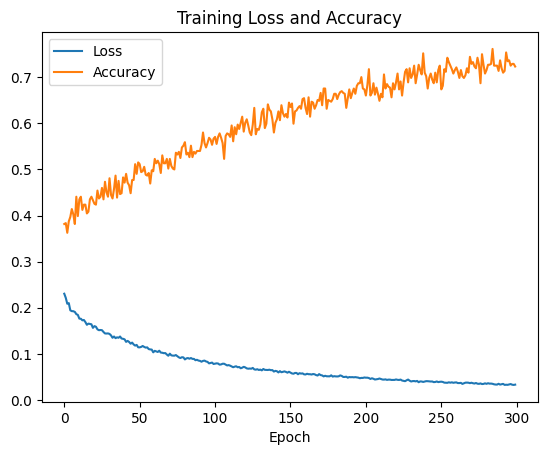

In [67]:
print(history.history.keys())

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [437]:
to_predict = df.head(12)
to_predict.drop([to_predict.index[0]],axis=0, inplace=True)
to_predict

<ipython-input-437-b9ff1ee6f838>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict.drop([to_predict.index[0]],axis=0, inplace=True)


,N01,N02,N03,N04,N05,N06,N07,N08,N09,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20
1,1,4,6,10,12,15,17,19,34,37,40,44,46,47,51,54,56,57,60,68
2,1,4,5,6,10,15,18,26,31,33,42,45,48,51,55,56,62,65,68,69
3,5,6,8,9,12,15,23,25,40,41,42,43,47,48,49,56,57,63,65,66
4,2,3,4,9,19,20,22,23,36,39,41,48,54,55,57,58,60,61,63,66
5,7,8,10,17,18,22,25,27,29,34,42,45,46,51,55,56,59,62,64,67
6,1,10,12,19,21,22,27,35,37,38,39,43,45,46,52,54,55,62,63,70
7,5,6,7,12,14,16,18,21,22,31,49,54,56,58,59,61,63,64,66,68
8,1,11,14,16,17,20,22,27,29,30,45,47,51,52,55,57,61,62,65,70
9,5,6,13,18,31,34,36,39,40,41,43,44,48,51,57,60,62,64,66,69
10,3,7,9,10,24,26,32,34,38,42,43,45,47,52,54,56,64,66,67,68


In [438]:
to_predict = np.array(to_predict)
to_predict

array([[ 1,  4,  6, 10, 12, 15, 17, 19, 34, 37, 40, 44, 46, 47, 51, 54,
        56, 57, 60, 68],
       [ 1,  4,  5,  6, 10, 15, 18, 26, 31, 33, 42, 45, 48, 51, 55, 56,
        62, 65, 68, 69],
       [ 5,  6,  8,  9, 12, 15, 23, 25, 40, 41, 42, 43, 47, 48, 49, 56,
        57, 63, 65, 66],
       [ 2,  3,  4,  9, 19, 20, 22, 23, 36, 39, 41, 48, 54, 55, 57, 58,
        60, 61, 63, 66],
       [ 7,  8, 10, 17, 18, 22, 25, 27, 29, 34, 42, 45, 46, 51, 55, 56,
        59, 62, 64, 67],
       [ 1, 10, 12, 19, 21, 22, 27, 35, 37, 38, 39, 43, 45, 46, 52, 54,
        55, 62, 63, 70],
       [ 5,  6,  7, 12, 14, 16, 18, 21, 22, 31, 49, 54, 56, 58, 59, 61,
        63, 64, 66, 68],
       [ 1, 11, 14, 16, 17, 20, 22, 27, 29, 30, 45, 47, 51, 52, 55, 57,
        61, 62, 65, 70],
       [ 5,  6, 13, 18, 31, 34, 36, 39, 40, 41, 43, 44, 48, 51, 57, 60,
        62, 64, 66, 69],
       [ 3,  7,  9, 10, 24, 26, 32, 34, 38, 42, 43, 45, 47, 52, 54, 56,
        64, 66, 67, 68],
       [ 8, 10, 13, 16, 17, 18

In [439]:
scaled_to_predict = scaler.transform(to_predict)

In [440]:
y_pred = model.predict(np.array([scaled_to_predict]))
result = scaler.inverse_transform(y_pred).astype(int)[0]

print("The predicted numbers in the last lottery game are:", result, "\n\n")

1/1 [==============================] - 4s 4s/step
The predicted numbers in the last lottery game are: [10 12 17 20 26 28 31 28 30 34 37 42 46 46 47 49 52 55 59 66] 




In [441]:
prediction = df.head(1)
prediction = np.array(prediction)
print("The actual numbers in the last lottery game were:", prediction[0])

The actual numbers in the last lottery game were: [ 9 10 13 14 17 18 19 32 34 39 40 47 49 52 53 55 62 67 69 70]


In [442]:
temp = np.array(scaler.inverse_transform(y_pred).astype(int)[0])
combined_array = np.concatenate((temp, np.array(prediction[0])))
winning_numbers = np.bincount(combined_array)
winners = np.unique(combined_array)

uniques, uniq_idx, counts = np.unique(combined_array,return_index=True,return_counts=True)
duplicates = combined_array[ uniq_idx[counts>=2] ]  # <--- Get duplicates

print("winners:", duplicates)
print(len(duplicates)/20)

winners: [10 17 28 34 46 47 49 52 55]
0.45


In [432]:
''' from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, batch_size=50, epochs=300, verbose=2)

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions on the test set
predictions = model.predict(X_test) '''


" from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train the model\nhistory = model.fit(X_train, y_train, batch_size=50, epochs=300, verbose=2)\n\n# Evaluate on the test set\nloss, accuracy = model.evaluate(X_test, y_test, verbose=2)\nprint(f'Test Loss: {loss}, Test Accuracy: {accuracy}')\n\n# Make predictions on the test set\npredictions = model.predict(X_test) "